# Data Analysis Process
The data analysis process includes the following steps:
   * **Questioning Phase**
   * **Data Wrangling Phase**
   * **Data Exploration Phase**
   * **Drawing Conclusion Phase**
   * **Communication Phase**

***Important Notes:***
   - Exploring your data is never a waste of time for a data analyst

# References:

Python collections + defaultdict: https://docs.python.org/2/library/collections.html#collections.defaultdict

## Data Wrangling and Python
**Data Wrangling** or **Data Munging** is loosely the process of manually converting or mapping data from one *"raw"* form into another format that allows for more convenient consumption of the data with the help of semi-automated tools. There are two sub-steps under the Data Wrangling: **Data Acquisition** and **Data Cleaning**

## Data Acquisition and Python

In [47]:
# Using Python's unicodecsv module
import unicodecsv

# A function for reading csv files
def unicsv_dictReader(filename):
    file_pointer = open(filename, 'rb')
    return list(unicodecsv.DictReader(file_pointer))

# Acquiring data using the unicsv_dictReader function
daily_engagement = unicsv_dictReader("../data/daily_engagement.csv")
enrollments = unicsv_dictReader("../data/enrollments.csv")
project_submissions = unicsv_dictReader("../data/project_submissions.csv")

## Data Cleaning and Phyton

**Data Cleansing**, also called **Data Scrubbing**, is the process of amending or removing data in a database that is incorrect, incomplete, improperly formatted, or duplicated.

In [48]:
# A function for parsing string dates to datetime objects
from datetime import datetime

def parse_date(str_date):
    if(str_date==""):    
        return None
    #elif(str_date==None):
    #    return None
    #elif(isinstance(str_date, datetime)):   # if the argument is already datetime, return the argument
    #    return str_date
    else:
        return datetime.strptime(str_date, '%Y-%m-%d')

### Cleaning daily_engagement.csv

In [49]:
# Cleaning daily_engagement.csv
for listItem in daily_engagement:
    
    listItem['lessons_completed'] = int(float(listItem['lessons_completed']))
    listItem['num_courses_visited'] = int(float(listItem['num_courses_visited']))
    listItem['projects_completed'] = int(float(listItem['projects_completed']))
    
    listItem['total_minutes_visited'] = float(listItem['total_minutes_visited'])
    
    listItem['utc_date'] = parse_date(listItem['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

### Changing 'acct' key to 'account_key' in daily_engagement.csv

In [50]:
for dict_item in daily_engagement:
    dict_item["account_key"] = dict_item["acct"]
    del dict_item["acct"]
daily_engagement[0]

{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

### Cleaning enrollments.csv

In [51]:
# Cleaning enrollments.csv
def parse_maybe_int(i):
    if (i == ''):
        return None
    else:
        return int(i)

for listItem in enrollments:
    
    listItem['status'] = str(listItem['status'])
    
    listItem['is_udacity'] = listItem['is_udacity']=='True'
    listItem['is_canceled'] = listItem['is_canceled']=='True'
    
    listItem['join_date'] = parse_date(listItem['join_date'])
    listItem['cancel_date'] = parse_date(listItem['cancel_date'])
    
    listItem['days_to_cancel'] = parse_maybe_int(listItem['days_to_cancel'])
    
    #listItem['days_to_cancel'] = int((listItem['days_to_cancel'])) if (listItem['days_to_cancel']!='') else None  #ternary operator
    #another way of writing the ternary conditional operator
    #(false,true)[condition] - access the tuple element by the condition. (tuple)[0]-false (tuple)[1]-true
    #listItem['days_to_cancel'] = [0,int((listItem['days_to_cancel']))][listItem['days_to_cancel']!=""]
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': 'canceled'}

### Cleaning project_submissions.csv

In [52]:
# Cleaning project_submissions.csv
for listItem in project_submissions:
    listItem['completion_date'] = parse_date(listItem['completion_date'])
    listItem['creation_date'] = parse_date(listItem['creation_date'])
    
project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

### Counting the total number of rows & unique students for each CSV file

In [53]:
# Count the total number of unique accounts for each CSV file

def getUniqKeySet(csv_list):    
    #SHORTER WAY BY USING SETS
    uniq_keySet = set()
    for dict_temp in csv_list:
        uniq_keySet.add(dict_temp['account_key'])
    return uniq_keySet
    
    #IF ACCOUNT KEYS ARE DIFFERENT
    #if ("account_key" in csv_list[0].keys()):
    #    temp_key = "account_key"
    #else:
    #    temp_key = "acct"
    
    #LONG WAY BY USING LIST
    #uniq_keyList = []
    #for dict_temp in csv_list:
    #    if (not dict_temp[temp_key] in uniq_keyList):
    #        uniq_keyList.append(dict_temp[temp_key])
    #
    #return len(uniq_keyList)

#### For daily_engagement.csv

In [54]:
# Contains every unique student's and udacity's test account keys 
engagement_unique_key_set = getUniqKeySet(daily_engagement)
engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = len(engagement_unique_key_set)

print "Number of rows: %d" % engagement_num_rows
print "Number of unique students: %d" % engagement_num_unique_students

Number of rows: 136240
Number of unique students: 1237


#### For enrollments.csv

In [55]:
# Contains every unique student's and udacity's test account keys
enrollments_unique_key_set = getUniqKeySet(enrollments)
enrollments_num_rows = len(enrollments)
enrollments_num_unique_students = len(enrollments_unique_key_set)

print "Number of rows: %d" % enrollments_num_rows
print "Number of unique students: %d" % enrollments_num_unique_students

Number of rows: 1640
Number of unique students: 1302


#### For projects_submission.csv

In [56]:
# Contains every unique student's and udacity's test account keys
submission_unique_key_set = getUniqKeySet(project_submissions)
submissions_num_rows = len(project_submissions)
submissions_num_unique_students = len(submission_unique_key_set)

print "Number of rows: %d" % submissions_num_rows
print "Number of unique students: %d" % submissions_num_unique_students

Number of rows: 3642
Number of unique students: 743


### Counting the number of students with no engagement

**Problem Identified:** The number of unique students in the enrollment.csv is greater than the unqiue students in the daily_engagement.csv. 

**Explanation:** The students may have enrolled and canceled on the same day which resulted for them not to be included in daily_engagement.csv

In [57]:
# Check students that are in the enrollment.csv but not in daily_engagement.csv
num_student_enrollment_noEngagement = 0
for enrollment_key in enrollments_unique_key_set:
    if (enrollment_key not in engagement_unique_key_set):
        num_student_enrollment_noEngagement+=1
        
print "Students with no engagement: %d" % (num_student_enrollment_noEngagement)

Students with no engagement: 65


**Additional Problem:** Are all the students that have no engagement record, enrolled and canceled on the same day?

**Explanation:** Yes, and all of these student records are Udacity's test accounts. Hence, must be removed.

In [58]:
# Check if there are students that enrolled for 1 day or more, that have no engagement
student_with_problem_list = []

for enrollment in enrollments:
    student = enrollment['account_key']
    if ((student not in engagement_unique_key_set) and (enrollment['join_date']!=enrollment['cancel_date'])):
        student_with_problem_list.append(enrollment)

print "Students with no engagement and enrolled for more than a day: %d" % len(student_with_problem_list)
#student_with_problem_list   # students in this list are udacity test accounts

Students with no engagement and enrolled for more than a day: 3


**Solution:** Remove Udacity's test accounts in the records 

### Removing Udacity's test accounts in records

Since most of the students that have enrolled for more than a day, and have no engagement are Udacity's test accounts; we must remove it.

In [59]:
# Get all Udacity's test account keys
student_is_udacity_keySet = set()   # Set that contains the account keys of every Udacity test account

for enrollment in enrollments:
    if (enrollment['is_udacity']==True):
        student_is_udacity_keySet.add(enrollment['account_key'])

# Remove all Udacity's test account in every record: enrollments, daily_engagement, project_submissions
def remove_account(csvList,keySet):
    "Adds records with 'account_key' not in keySet from csvList"
    csvList = [csvlist_item for csvlist_item in csvList if (csvlist_item['account_key'] not in keySet)]
    return csvList

In [60]:
# There are 18 udacity accounts
#print "Number before in enrollments: %d" % len(enrollments)
#print "Number before in enrollments: %d" % len(daily_engagement)
#print "Number before in enrollments: %d" % len(project_submissions)

non_udacity_enrollments = remove_account(enrollments,student_is_udacity_keySet)
non_udacity_daily_engagement = remove_account(daily_engagement,student_is_udacity_keySet)
non_udacity_project_submissions = remove_account(project_submissions, student_is_udacity_keySet)

print "Number of non-Udacity test accounts in enrollments: %d" % len(non_udacity_enrollments)
print "Number of non-Udacity test accounts in daily_engagement: %d" % len(non_udacity_daily_engagement)
print "Number of non-Udacity test accounts in project_submissions: %d" % len(non_udacity_project_submissions)

Number of non-Udacity test accounts in enrollments: 1622
Number of non-Udacity test accounts in daily_engagement: 135656
Number of non-Udacity test accounts in project_submissions: 3634


## Data Exploration and Python

**Data Exploration** is a step in data analysis and typically involves summarizing the main characteristics of a dataset. It is commonly conducted using visual analytics tools, but can also be done in more advanced statistical software, such as R.

**Question:** How do numbers in the daily engagement table differ for students who pass the first project.

**Problems:** 

   **<p>1. This will include data from after the project submission:</p>**
   - We are not concerned regarding the data after the first subject has been submitted. Hence, we would only be looking at the engagement data from before the submission of the first project.
  
      
   **<p>2. This compares data from different lengths of time:</p>**
   - If we will look at the engagement data after the submission of the first project, then we might be comparing different lengths of time. And since there might be a trend for student's daily engagement (i.e. Engagement might tend to drop off after the first few days), comparing one month of student, can be misleading if we were to compare it for two months of another student.
      
      
   **<p>3. Includes engagament in course not related to the first project</p>**
   - Since the engagement data includes engagement data on other courses that is not related to the first subject, which can be a little weird for the data (i.e. A student may look into another course before submitting the first subject)
     
**Revision:** Only look at engagement from first week, and exclude students who cancel within a week. In this way:

   - we would be comparing the student's engagement in equal amounts of time (that is 1 week);
   
   - we would also have the benefit of excluding people who have cancelled during the free trial, which was 7 days at the time this data was collected (i.e. *days_to_cancel <= 7*)

### Creating a dictionary of students

Create a dicitonary of students who either:

  - haven't canceled yet *(days_to_cancel = None)*
  
  - stayed enrolled for more than 7 days *(days_to_cancel > 7)*
  
*paid_students = [{'account_keys':enrollment_date}, {'account_keys':enrollment_date}, ... ]*

In [61]:
non_udacity_enrollments[0]

{u'account_key': u'700',
 u'cancel_date': datetime.datetime(2014, 11, 16, 0, 0),
 u'days_to_cancel': 6,
 u'is_canceled': True,
 u'is_udacity': False,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': 'canceled'}

In [62]:
# Creating a dictionary of paid students based on the enrollments.csv
paid_students = {}   # Creates an empty list
for enrollment in non_udacity_enrollments:  # Get data from non-udacity test accounts
        if ( (not enrollment['is_canceled']) or (enrollment['days_to_cancel']>7) ):  # Student is paid account
            dict_key = enrollment['account_key'] # Store account key
            dict_value = enrollment['join_date'] # Store enrollment date
            
            if ((dict_key not in paid_students) or \
                    (dict_value>paid_students[dict_key])): 
                paid_students[dict_key] = dict_value # Add student to dictionary if key is not yet in OR the enrollment day is the latest
                
len(paid_students)        

995

### Removing the free trial accounts in each CSV

Since we already have a list of students who have enrolled for more than a week, and payed for the course, we can start narrowing the data some more. That is, create a list of students that non trial accounts from each csv.

In [63]:
# Function that determines if two dates are within a week each other
def within_one_week(join_date, engagement_date):
    delta_date = engagement_date - join_date
    return (delta_date.days < 7 and delta_date.days >= 0)

# Function that removes the free_trial accounts in the given list
def remove_free_trial_cancels(csv_list):
    newList = []
    for data in csv_list:
        if(data['account_key'] in paid_students):
            newList.append(data)
    
    return newList

In [64]:
# Contains the data of all the Udacity Students that have paid at least once
# The data used here came from the non-Udacity test accounts data
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_daily_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_project_submissions)

print 'Number of paid students under the enrollment.csv: %d' % len(paid_enrollments)
print 'Number of paid students under the daily_engagemebt.csv: %d' % len(paid_engagement)
print 'Number of paid students under the project_submissions.csv: %d' % len(paid_submissions)

Number of paid students under the enrollment.csv: 1293
Number of paid students under the daily_engagemebt.csv: 134549
Number of paid students under the project_submissions.csv: 3618


### Adding the 'has_visited' key-value pair

Adding a 'has_visited' key-value pair in the paid_engagement data, which would be used later to compute for the number of days an account has visited the Udacity Home within the first week.

In [65]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

### Getting the engagement data of the paid students

Create a new list that contains the engagement data of the paid students identified before, and student's join date is within one week of the student's join date.

In [66]:
# This list contains the engagement data of students in their first week
paid_engagement_in_first_week = []

for engagement in paid_engagement:
    if (within_one_week(paid_students[engagement['account_key']], engagement['utc_date']) ):
        paid_engagement_in_first_week.append(engagement)
    
len(paid_engagement_in_first_week)

6919

### Computing for the average minutes spent in classroom

Since the paid_engagement_in_first_week contains an unordered list of students with there account keys and engagement date, we want to:

   - Group the engagement data per student. That is, create a dictionary mapping with account keys and the list of that account's engagement data.

### Categorizing engagement times into each student

To do this, we must use Python's collections, specifically collections.defaultdict.

Example:

    s = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]
    d = defaultdict(list)
    for k, v in s:
         d[k].append(v)
    d.items()
    [('blue', [2, 4]), ('red', [1]), ('yellow', [1, 3])]

### Categorizing the engagement record per account type

In [67]:
# Trying to use the collections.defaultdict
# It worked! :D
from collections import defaultdict

engagement_by_account = defaultdict(list) #defaultdict(list) if you try to look up an invalid key, it will return empty list

for engagement in paid_engagement_in_first_week:
    # Appending the whole engagement would make the dictionary values be list of dictionary engagement records
    engagement_by_account[engagement['account_key']].append(engagement)  
    
len(engagement_by_account)

995

### Creating a function for grouping data

In [68]:
# Function that would group the data according to the given key 
# i.e If the given key is 'lessons_completed', then the key will be lessons_completed and the values are the list of
#     dictionaries having the same values under the lessons_completed key
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

# Function that would sum the values under the field_name
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total_field_name = 0
        for data_point in data_points:
            total_field_name += data_point[field_name]
        summed_data[key] = total_field_name
    return summed_data    

# Create a function that would describe the data using numpy functions
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def describe_data(data, title, xlabel, binNum=None, labelStr=None):
    print 'Mean: ', np.mean(data)
    print 'Standard Deviation: ', np.std(data)
    print 'Minimum: ', np.min(data)
    print 'Maximum: ', np.max(data)
    
    #Check if there is bin argument
    if (binNum==None and labelStr==None):
        plt.hist(data, alpha=0.5)  
    elif (binNum==None and labelStr!=None):
        plt.hist(data, alpha=0.5, label=labelStr)
    else:
        plt.hist(data, bins=binNum, alpha=0.5, label=labelStr)
        
    #Check if labels are needed
    if (labelStr!=None): 
        plt.legend(loc='upper right')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('No. of Accounts')


### Getting the total minutes of engagement per account

Mean:  306.708326753
Standard Deviation:  412.996933409
Minimum:  0.0
Maximum:  3564.7332645


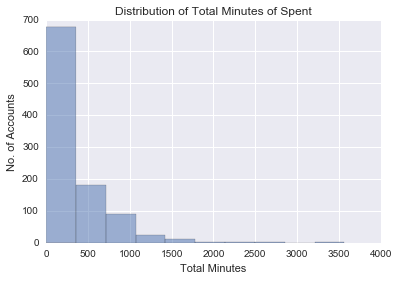

In [69]:
##############################################################################################################################
# BEFORE CREATING THE FUNCTION ABOVE
# Getting the average time of engagement of per account
#total_minutes_by_account = {}
# Get the average of the times for each data
#for key, engagement_record in engagement_by_account.items(): # The engagement_record is a list of dictionary
#    total_minutes = 0
#    for engagement in engagement_record: # Looking at every dictionary of that key
#        total_minutes += engagement['total_minutes_visited']
#    total_minutes_by_account[key] = total_minutes  
##############################################################################################################################

# Using the group_data function to group the engagement record by account key
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

# Getting the total minutes of engagement per account
total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

# Displaying the data by using describe_data function
describe_data(total_minutes_by_account.values(), 'Distribution of Total Minutes of Spent', 'Total Minutes')


### Exploring the data about the lessons completed within the first week

In [70]:
#############################################################################################################################
# Before using the functions
#total_lessons_by_account = {}
#
# Get the lessons by account
#for key, engagement_record in engagement_by_account.items():
#    total_lessons = 0
#    for dict_item in engagement_record:
#        total_lessons += dict_item['lessons_completed']
#    total_lessons_by_account[key] = total_lessons 
#
#total_lessons = total_lessons_by_account.values()
#
# Using numpy to compute the mean, std dev, min, max
#print "Lessons completed mean: ", np.mean(total_lessons)
#print "Lessons completed deviation: ", np.std(total_lessons)
#print "Lessons completed minimum: ", np.min(total_lessons)
#print "Lessons completed maximum: ", np.max(total_lessons)
#############################################################################################################################

Mean:  1.63618090452
Standard Deviation:  3.00256129983
Minimum:  0
Maximum:  36


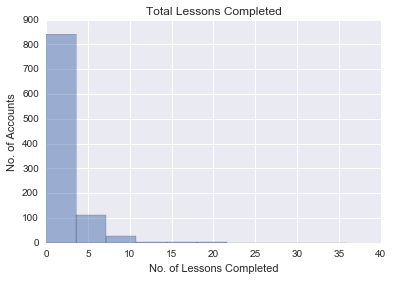

In [71]:
# Summing the total lessons by account
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

# Displaying the data
describe_data(lessons_completed_by_account.values(), 'Total Lessons Completed', 'No. of Lessons Completed')

### Exploring the data regarding the number of days a student has visited the classrom within the first week

In [72]:
# ONE WAY OF DOING IT BUT LONG WAY
# Using the paid engagement in first week data - paid_engagement_in_first_week
# Add another key-value item in each dictionary record
#
#for engagement in paid_engagement_in_first_week:
#    num_courses_visited = engagement['num_courses_visited']
#    if (num_courses_visited > 0):
#        engagement['has_visited'] = 1 # Student have visited
#    else:
#        engagement['has_visited'] = 0 # Student have not visited

# My way that worked
# Adding 'has_visited' key value pair to the engagament_by_account
#for engagement_list in engagement_by_account.values():
#    for engagement in engagement_list:
#        num_courses_visited = engagement['num_courses_visited']
#        if (num_courses_visited > 0):
#            engagement['has_visited'] = 1 # Student have visited
#        else:
#            engagement['has_visited'] = 0 # Student have not visited
#
# Summing the days a student have visited the Udacity Home in their first week
#total_days_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
#
#Printing the details of the total_days
#describe_data(total_days_by_account.values())

Mean:  2.86733668342
Standard Deviation:  2.25519800292
Minimum:  0
Maximum:  7


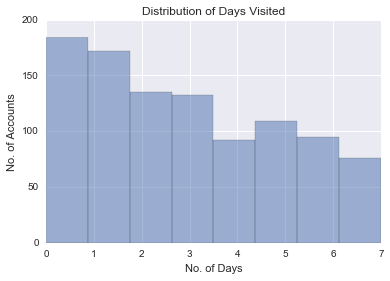

In [73]:
# INSTRUCTOR'S WAY
# Added the has_visited key-value pair after removing the free trial accounts

# Summing the days a student have visited the Udacity Home in their first week
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')

#Printing the details of the total_days
describe_data(days_visited_by_account.values(), 'Distribution of Days Visited', 'No. of Days', 8)

### Splitting the engagement data into two lists

Split the engagement data into two lists: passing_engagement, non_passing_engagement. The passing_engagement list contains students who passed their first project, whereas the non_passing_engagement contains the students who haven't passed their first project. Assume that the first project done is entitled: Analyzing New York Subway Data

In [74]:
# A student would have pass a subject with either of these two keys
# Compare the key under the paid_submissions data with key - 'lesson_key' & check the assigned rating if passed
subway_project_lesson_keys = ['746169184', '3176718735'] # First project keys

def check_project(data, project_key_list):
    "Check each of the data's project is within the key_list and have passed. Returns the passed list"
    passed_list = set()
    for data_item in data:
        data_project_key = data_item['lesson_key']
        data_project_rating = data_item['assigned_rating']
        if (data_project_key in project_key_list and \
                (data_project_rating == 'PASSED' or data_project_rating == 'DISTINCTION')):
            passed_list.add(data_item['account_key'])
    return passed_list

In [75]:
# Set of account keys that passed the first project
pass_project = check_project(paid_submissions, subway_project_lesson_keys)

# List to categorize student's engagement record
passing_engagement = []
non_passing_engagement = []

# Find the engagement record in the paid_engagement_in_first_week 
# paid_engagement_in_first_week - List. Contains all the student engagement dictionary(not categorized)
for engagement in paid_engagement_in_first_week:
    if (engagement['account_key'] in pass_project):
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)


print len (non_passing_engagement)
print len (passing_engagement)

2392
4527


In [76]:
# Check the project submissions data of students who passed their project. That is the assigned rating is passed or distinction

# Grouping the passing_engagement by account_keys
grouped_passing_engagement = group_data(passing_engagement, 'account_key')

### Computing some metrics about a student's first week

What we know:
   - days visited by account
   - total minutes by account
   - accounts that passed and didn't passed the first project

In [77]:
# WHAT WE KNOW:
# days_visited_by_account
# total_minutes_by_account

# Group the passing and non-passing engagement
grouped_passing_engagement = group_data(passing_engagement, 'account_key')
grouped_non_passing_engagement = group_data(non_passing_engagement, 'account_key')

#### Calculating the total minutes visited from the two groups

Total minutes visited:

Passing students: 
Mean:  394.586046484
Standard Deviation:  448.499519327
Minimum:  0.0
Maximum:  3564.7332645

Non-passing students: 
Mean:  143.326474267
Standard Deviation:  269.538619011
Minimum:  0.0
Maximum:  1768.52274933


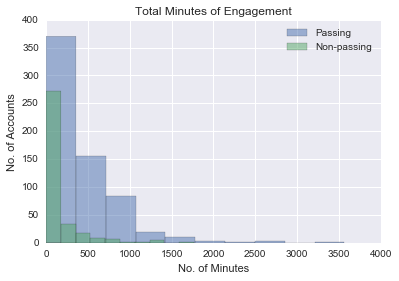

In [78]:
# Calculate the total minutes visited
passing_total_minutes = sum_grouped_items(grouped_passing_engagement,'total_minutes_visited')
non_passing_total_minutes = sum_grouped_items(grouped_non_passing_engagement,'total_minutes_visited')

print 'Total minutes visited:\n'

print 'Passing students: '
describe_data(passing_total_minutes.values(), 'Total Minutes of Engagement', 'No. of Minutes', labelStr='Passing')

print '\nNon-passing students: '
describe_data(non_passing_total_minutes.values(), 'Total Minutes of Engagement', 'No. of Minutes', labelStr='Non-passing')


** Observation: ** On average,the students who passed the first project spent almost 50% more minutes than those who didn't

#### Calculating the total days visited for each group

Total Days Visited: 

Passing students: 
Mean:  3.38485316847
Standard Deviation:  2.25882147092
Minimum:  0
Maximum:  7

Non-passing students: 
Mean:  1.90517241379
Standard Deviation:  1.90573144136
Minimum:  0
Maximum:  7


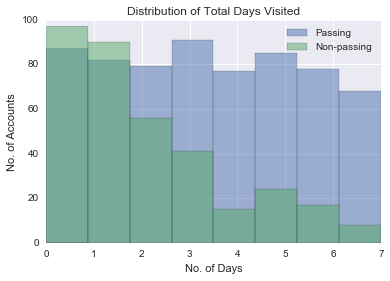

In [79]:
# Calculate the total days visited
passing_total_days = sum_grouped_items(grouped_passing_engagement,'has_visited')
non_passing_total_days = sum_grouped_items(grouped_non_passing_engagement,'has_visited')

print 'Total Days Visited: \n'

print 'Passing students: '
describe_data(passing_total_days.values(), "Distribution of Total Days Visited", 'No. of Days', binNum=8, labelStr='Passing')

print '\nNon-passing students: '
describe_data(non_passing_total_days.values(), "Distribution of Total Days Visited", 'No. of Days', binNum=8, labelStr='Non-passing')

### Calculating the total number of lessons completed per group

Total Lessons Completed: 

Passing students: 
Mean:  2.05255023184
Standard Deviation:  3.14222705558
Minimum:  0
Maximum:  36

Non-passing students: 
Mean:  0.862068965517
Standard Deviation:  2.54915994183
Minimum:  0
Maximum:  27


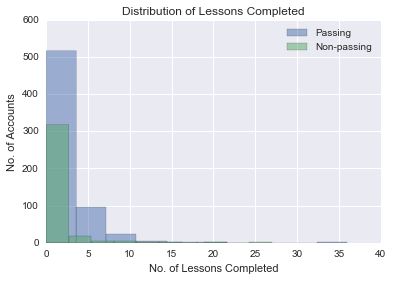

In [80]:
passing_total_lessons = sum_grouped_items(grouped_passing_engagement,'lessons_completed')
non_passing_total_lessons = sum_grouped_items(grouped_non_passing_engagement,'lessons_completed')

print 'Total Lessons Completed: \n'

print 'Passing students: '
describe_data(passing_total_lessons.values(), 'Distribution of Lessons Completed', 'No. of Lessons Completed', labelStr='Passing')

print '\nNon-passing students: '
describe_data(non_passing_total_lessons.values(), 'Distribution of Lessons Completed', 'No. of Lessons Completed', labelStr='Non-passing')

## Data Visualization & Python

### Creating Histograms

Syntax:
    
    data = [1, 2, 1, 3, 3, 1, 4, 2]

    %matplotlib inline # Causes the plots to be in the notebook
    import matplotlib.pyplot as plt
    plt.hist(data)

In [81]:
#%matplotlib inline
#import matplotlib.pyplot as plt
# Added the plt.hist() in the describe_data function

### Histogram of total minutes visited

**Observation:** Both of the histogram for the total minutes visited are positively skewed

(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

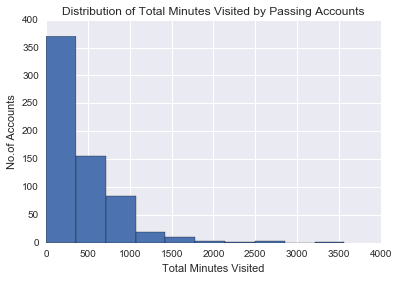

In [82]:
# For the passing students
plt.title('Distribution of Total Minutes Visited by Passing Accounts')
plt.xlabel('Total Minutes Visited')
plt.ylabel('No.of Accounts')
plt.hist(passing_total_minutes.values())

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

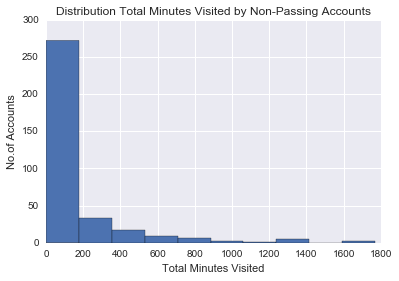

In [83]:
# For the passing students
plt.title('Distribution Total Minutes Visited by Non-Passing Accounts')
plt.xlabel('Total Minutes Visited')
plt.ylabel('No.of Accounts')
plt.hist(non_passing_total_minutes.values())

### Histogram of total days visited

**Observation:** The histogram for the passing students seemed to be uniformly distributed. Whereas, for the non-passing students, the distribution is positively skewed

(array([ 87.,  82.,  79.,  91.,  77.,  85.,  78.,  68.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

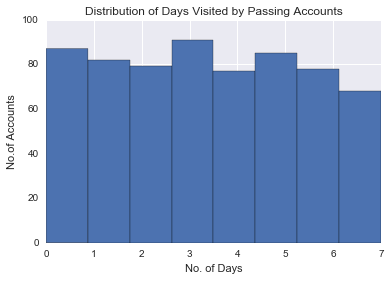

In [84]:
plt.title('Distribution of Days Visited by Passing Accounts')
plt.xlabel('No. of Days')
plt.ylabel('No.of Accounts')
plt.hist(passing_total_days.values(), bins=8)

(array([ 97.,  90.,  56.,  41.,  15.,  24.,  25.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 7 Patch objects>)

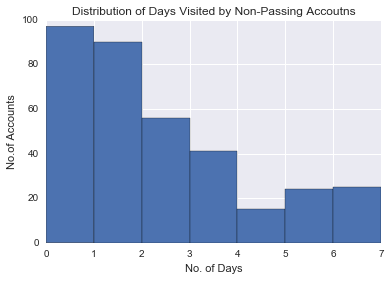

In [85]:
plt.title('Distribution of Days Visited by Non-Passing Accoutns')
plt.xlabel('No. of Days')
plt.ylabel('No.of Accounts')
plt.hist(non_passing_total_days.values(), bins=7)

### Histogram of total lessons completed
**Observation: ** Both of the histogram follows positively skewed distribution

(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

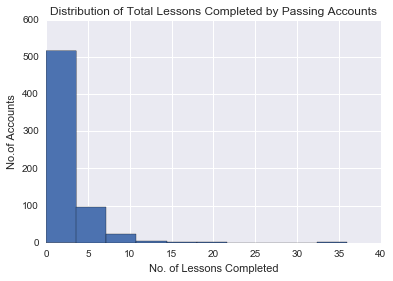

In [86]:
plt.title('Distribution of Total Lessons Completed by Passing Accounts')
plt.xlabel('No. of Lessons Completed')
plt.ylabel('No.of Accounts')
plt.hist(passing_total_lessons.values())

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

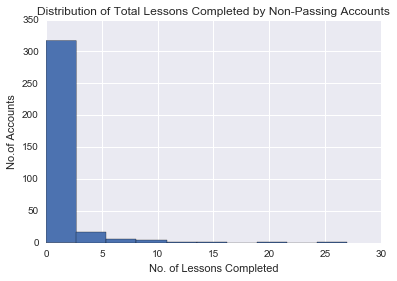

In [87]:
plt.title('Distribution of Total Lessons Completed by Non-Passing Accounts')
plt.xlabel('No. of Lessons Completed')
plt.ylabel('No.of Accounts')
plt.hist(non_passing_total_lessons.values())

## Data Conclusion using Statistics

**Claim:** There is a significant difference in total minutes visited for the students who passed the first project than those who didn't.

**Hypotheses:**

$H_0: {\mu_p - \mu_n \leq 0}$

$H_a: {\mu_p - \mu_n > 0}$

### Descriptive Statistics & Histograms

Passing students: 
Mean:  394.586046484
Standard Dev.:  448.846520941

Non-passing students: 
Mean:  143.326474267
Standard Dev.:  269.926723776


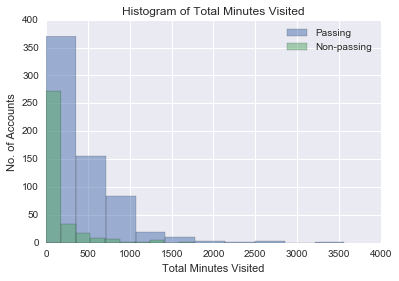

In [88]:
# Descriptive Statistics & Histogram
n_p = len(passing_total_minutes)
passing_mean = np.mean(passing_total_minutes.values())
passing_std = np.std(passing_total_minutes.values(), ddof=1)
n_n = len(passing_total_minutes)
non_passing_mean = np.mean(non_passing_total_minutes.values())
non_passing_std = np.std(non_passing_total_minutes.values(), ddof=1)

print 'Passing students: '
print 'Mean: ', passing_mean
print 'Standard Dev.: ', passing_std

print '\nNon-passing students: '
print 'Mean: ', non_passing_mean
print 'Standard Dev.: ', non_passing_std


plt.title('Histogram of Total Minutes Visited')
plt.xlabel('Total Minutes Visited')
plt.ylabel('No. of Accounts')
plt.hist(passing_total_minutes.values(), alpha=0.5, label='Passing')
plt.hist(non_passing_total_minutes.values(), alpha=0.5, label='Non-passing')

plt.legend(loc='upper right')

### Exporting data to CSV

In [89]:
import csv

# Export passing_total_minutes
with open('../data/pass.csv', 'w') as file_pointer:
    csv_writer = csv.writer(file_pointer, lineterminator='\n')
    for data in passing_total_minutes.values():
        csv_writer.writerow([data])

# Export non_passing_total_minutes
with open('../data/datanonpass.csv', 'w') as file_pointer:
    csv_writer = csv.writer(file_pointer, lineterminator='\n')
    for data in non_passing_total_minutes.values():
        csv_writer.writerow([data])


### Computing for Pooled Standard Deviation, Standard Error, and t-Statistics
$S_p = \sqrt{\frac{S_1^2(n_1-1) + S_2^2(n_2-1)}{n_1+n_2-2}} = 395.6304619$

$SEM = S_p\sqrt{{\frac{1}{n_1}}+{\frac{1}{n_2}}} = 26.30022725$


### Conclusion

Using MS Excel's data analysis tool, the following result was obtained.
   <img src='../figures/result.png' />


**Conclusion: ** Since, $t(993) = 9.553513351, p<0.0001$, then we reject the null hypothesis. Specifically, the average total minutes spent by students who passed their first project is significantly higher than those who did not

<center>*In loving memory of Joi.*</center>